In [1]:
#install pandas
#install pandas
import math
import numpy as np
import scipy as sp
import numpy.random as npr  
import scipy.stats as scs
from scipy import special
from scipy.special import factorial
import matplotlib.pyplot as plt
import numpy.random as npr
import datetime
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import *
import seaborn as sns
from scipy import integrate

In [2]:
#%run BCC_option_valuation.py

In [3]:
# SVCJ parameters
mu      = 0.042
r       = mu
mu_y    = -0.0492
sigma_y = 2.061
l       = 0.0515
alpha   = 0.0102
beta    = -0.188
rho     = 0.275
sigma_v = 0.007
rho_j   = 0 #-0.210
mu_v    = 0.709
v0      = 0.19**2 
kappa   = 1-beta
theta   = alpha / kappa

In [4]:
# Merton jump diffusion parameters
sigma_m  = 0.931
lamb_m   = 5.191
mu_m     =  -0.081
vol_m    = 0.001


EY       = mu_m +0.5* vol_m **2 -1
lambdd   = lamb_m *  np.exp(EY)
series   = 100000



In [5]:
npr.seed(12345)
dt      = 1/90. # dt
m       = int(90. * (1/dt)/90.) # time horizon in days
n       = 100000

#for trials
#dt = 1/10
#n= 1000
#m = int(10*(1/dt)/10)

In [6]:
T      = m * dt
t      = np.arange(0,T+dt, dt)
ttm    = np.arange(0, m+1, 1)/m

In [7]:
w      = npr.standard_normal([n,m])
w2     = rho * w + sp.sqrt(1-rho**2) * npr.standard_normal([n,m])
z_v    = npr.exponential(mu_v, [n,m])
z_y    = npr.standard_normal([n,m]) * sigma_y + mu_y + rho_j * z_v
dj     = npr.binomial(1, l * dt, size=[n,m])
s      = np.zeros([n,m+1])
v      = np.zeros([n,m+1])

In [8]:
s0     = 6500
k      = 6500*1.05
s[:,0] = s0 # initial CRIX level, p. 20
v[:,0] = v0

In [9]:
for i in range(1,m+1):
    v[:,i] = v[:,i-1] + kappa * (theta - np.maximum(0,v[:,i-1])) * dt + sigma_v * sp.sqrt(np.maximum(0,v[:,i-1])) * w2[:,i-1] + z_v[:,i-1] * dj[:,i-1]
    s[:,i] = s[:,i-1] * (1 + (r - l * (mu_y + rho_j * mu_v)) * dt + sp.sqrt(v[:,i-1] * dt) * w[:,i-1]) + z_v[:,i-1] * dj[:,i-1]

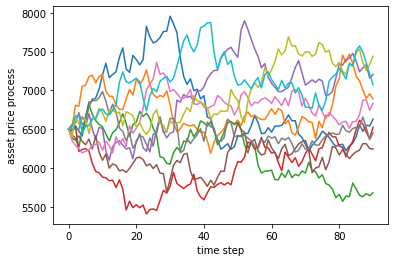

In [10]:
plt.plot(np.transpose(s[:10]));
plt.xlabel('time step')
plt.ylabel('asset price process')
plt.savefig('assetpath')

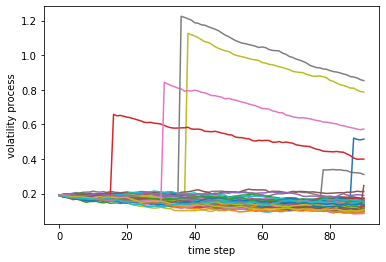

In [11]:
plt.plot(np.transpose(sp.sqrt(v[:70])));
plt.xlabel('time step')
plt.ylabel('volatility process')
plt.savefig('exactassetpath')

In [12]:
# Option pricing 
cp    = np.exp(-mu * m * dt) * np.maximum(s[:,-1]-k,0).mean()
cp

432.9137717377339

In [13]:
#greeks

def deltafunc(S, K, T, sigma, r):
    d1 = (sp.log(S/K) + (r + 0.5 * sp.square(sigma))*T) / (sigma * sp.sqrt(T))
    return scs.norm.cdf(d1) 

def deltablackscholes(sigma, r):
    d1 = (sp.log(s/k) + (r + 0.5 * sp.square(sigma))*(ttmmatrix)) / (sigma * sp.sqrt(ttmmatrix))
    return scs.norm.cdf(d1)
#deltablackscholes(0.1, 0.01)

In [14]:
#Hedge 
ttmmatrix = np.insert(ttm, 0, 0., axis=0)
ttmmatrix = T-np.tile(ttm, (n, 1))
ttmmatrix.shape

D_BS      = np.zeros([n,m+1])


In [15]:
D         = np.zeros([n,m+1])

#Merton jump diffusion prices 
D[:,0]     = np.exp(- lambdd *T)

ttmmatrica = np.zeros([series,m+1])
ttmmatrica = np.insert(ttm, 0, 0., axis=0)
ttmmatrica = np.tile(ttm, (series, 1))
ttmmatrica.shape



walker  = np.zeros([series,m+1])
sigma_i = np.zeros([series,m+1])
r_i     = np.zeros([series,m+1])
factor  = np.zeros([series,m+1])
expnt   = np.zeros([series,m+1])

In [16]:
walker  = np.tile(np.array(range(series)), (m+1,1))
walker  = np.transpose(walker)

expnt   = sp.exp(-lambdd*ttmmatrica)
naiti   = (lambdd*ttmmatrica)
fakt    = factorial(walker)

sigma_i = sigma_m**2 + (walker * sigma_m **2)/(T-ttmmatrica)
r_i     = r + lambdd *(1 - np.exp(EY))+ walker *EY/(T-ttmmatrica)


/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [17]:

def exponential(n): 
  
    # initialize sum of series 
    sum = 1
    delta = np.exp(-lambdd*T)
    for i in range(n, 0, -1): 
        sum = 1 + (lambdd*(T-ttmmatrica[i,:])) * sum / i 
        delta = delta + sum*sp.exp(-lambdd*(T-ttmmatrica[i,:]))*deltablackscholes(sigma_i[i,:], r_i[i,:])
        return delta
    print ("e^x =", delta) 
  
n = series-1

Summe = exponential(n)
Summe

/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/lilimatic/anaconda3/envs/lilisthesis/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


array([[0.34372158, 0.34711759, 0.3505807 , ..., 1.13348044, 1.15248212,
               nan],
       [0.34372158, 0.34711759, 0.3505807 , ..., 1.13348044, 1.15248212,
               nan],
       [0.34372158, 0.34711759, 0.3505807 , ..., 1.13348044, 1.15248212,
               nan],
       ...,
       [0.34372158, 0.34711759, 0.3505807 , ..., 1.13348044, 1.15248212,
               nan],
       [0.34372158, 0.34711759, 0.3505807 , ..., 1.13348044, 1.15248212,
               nan],
       [0.34372158, 0.34711759, 0.3505807 , ..., 1.13348044, 1.15248212,
               nan]])

In [18]:
deltamerton = Summe

In [19]:
# Dynamic delta
t         = 0;
d         = deltamerton[0,0]
s_pos     = d*s[0,0] # hedge in stock
b_pos     = cp - s_pos # borrow remainder from bank account
[cp, d, s_pos, b_pos, (s_pos + b_pos)]

b_pos0    = b_pos
s_pos0    = s_pos
d0        = d

PnL       = np.zeros(n);

# daily rebalancing

for i in range(1,m):
    ttm   = T - i*dt
    pos   = d * s[:,i] + b_pos * np.exp(r*dt) # current position value
    d     = deltamerton[:,i] # new delta
    s_pos = d * s[:,i]
    b_pos = pos - s_pos # make strategy self-financing any surplus or funds needed go through the bank account
    # final day / payoff
    
PnL       = (- np.maximum(s[:,-1]-6500,0) + d * s[:,i] + b_pos * np.exp(r*dt))/cp

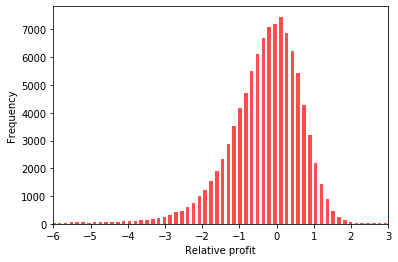

In [20]:
c, bins, patches = plt.hist(x=PnL, bins=300, color='r',alpha=0.7, rwidth=0.6)
plt.xlabel('Relative profit')
plt.ylabel('Frequency')
maxfreq = c.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(xmin = -6,xmax=3)
plt.savefig('PnLMertonHedge1MioLilik7000',transparent=T)
plt.show()


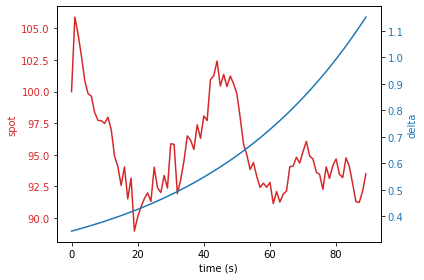

TypeError: plot() missing 1 required positional argument: 'i'

In [22]:
def plot(output, i):

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('spot', color=color)
    ax1.plot(s[i,0:-1]/s0*100, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('delta', color=color)  # we already handled the x-label with ax1
    ax2.plot(output[i,0:-1], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
plot(Summe,100)
plot(Summe)

In [54]:
import statistics

In [55]:
hedgeerror = [100*statistics.stdev(PnL)/cp]
hedgeerror

[0.27666914924604136]

In [56]:
a = np.array(PnL) 
quantile = [0.001, 0.01, 0.05,0.1,0.25,0.50,0.75,0.90,0.95, 0.99,0.999]
quantilesBS90 = np.zeros(len(quantile))
for i in range(len(quantile)):
    quantilesBS90[i] = np.quantile(a,quantile[i])
quantilesBS90

array([-9.51109491, -4.58416128, -2.15806531, -1.58206022, -0.85194191,
       -0.20109242,  0.3425933 ,  0.77081641,  1.01445718,  1.47587521,
        2.6241044 ])

In [57]:
std90 = round(statistics.stdev(PnL),3)
skew  = round(scs.skew(PnL),3)
kurt  = round(scs.kurtosis(PnL),3)

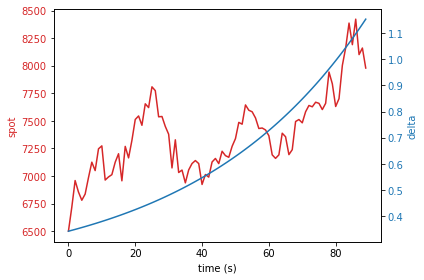

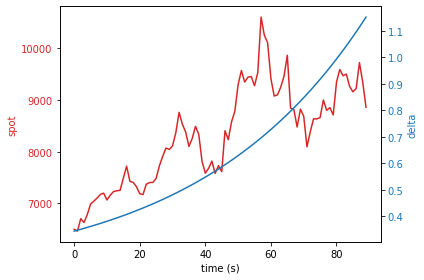

In [58]:
plot(Summe, 20)
plot(Summe, 1000)

In [59]:
hedgeerror = [100*statistics.stdev(PnL)/cp]
hedgeerror

[0.27666914924604136]

In [60]:
a = np.array(PnL) 
quantile = [0.001, 0.01, 0.05,0.1,0.25,0.50,0.75,0.90,0.95, 0.99,0.999]
quantilesBS90 = np.zeros(len(quantile))
for i in range(len(quantile)):
    quantilesBS90[i] = np.quantile(a,quantile[i])
quantilesBS90

array([-9.51109491, -4.58416128, -2.15806531, -1.58206022, -0.85194191,
       -0.20109242,  0.3425933 ,  0.77081641,  1.01445718,  1.47587521,
        2.6241044 ])

In [61]:
std90 = round(statistics.stdev(PnL),3)
skew  = round(scs.skew(PnL),3)
kurt  = round(scs.kurtosis(PnL),3)

In [62]:
[hedgeerror,
std90, 
skew,  
kurt] 

[[0.27666914924604136], 1.198, -3.796, 51.288]

In [63]:
merton90quant = np.array()
mertonerror90 = 
merton180quant = np.array()

mertonquanterror180 = 

mertonquant270 = np.array()

mertoneroor = 

merton360quant = np.array()
mertonhedgeerror360 = 

SyntaxError: invalid syntax (<ipython-input-63-d9fb5693e0e7>, line 7)

In [ ]:
data ={'Quantile':quantile, '3m':merton90quant, '6m': merton180quant, '9m':mertonquant270, '1y':merton360quant}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df = df.round(3)

In [ ]:
ATM

merton90quant = np.array([-6.69896785, -3.08482343, -1.30516454, -0.88263691, -0.34705977,
        0.13036985,  0.52918965,  0.84331204,  1.02203434,  1.36050681,
        2.20278853])
mertonerror90 = [[0.14887381440396893], 0.879, -3.796, 51.288]

merton180quant = np.array([-6.53883347, -2.99875218, -1.31402376, -0.88753218, -0.35056572,
        0.13171907,  0.53141447,  0.83742143,  1.01384014,  1.35682927,
        2.06568272])

mertonquanterror180 = [[0.15088067742974892], 0.883, -5.905, 235.123]

mertonquant270 = np.array([-6.51889705, -3.03354765, -1.31045825, -0.87281296, -0.32632939,
        0.15283356,  0.53515535,  0.83229448,  1.00661443,  1.3513465 ,
        1.96052373])

mertoneroor = [[0.14688848619932704], 0.868, -4.014, 69.592]

merton360quant = np.array([-6.76071304, -3.00143454, -1.32787458, -0.88493841, -0.32317869,
        0.15599814,  0.53891819,  0.8324144 ,  1.002336  ,  1.34723995,
        1.99006793])
mertonhedgeerror360 = [[0.1503233679824668], 0.877, -3.943, 51.205]